In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

**Introduction**

*Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that helps identify key features that explain most of the data's variance*

**Objective:**
   *Generate two datasets — one with distinct features and another with derived features.*
   *Apply PCA to observe the variance captured in both cases.*
   *Visualize the difference in PCA outcomes for independent vs. dependent data.*



**Dataset Generation:**

    Dataset 1: Independent (Distinct) Features:

*This dataset contains 10 unique features, each generated as independent random variables.*
*Every feature is drawn from a normal distribution with varying means and standard deviations to ensure diversity.*
*The goal is to observe PCA behavior on a dataset where features are not derived from each other.*

    Dataset 2: Correlated (Derived) Features:

*This dataset has 3 core features, while the remaining 7 features are derived from these core features using linear combinations.*

*The purpose here is to simulate a dataset with strong feature dependencies, mimicking real-world scenarios like multicollinear data.*

In [10]:
#  [0,1) IT MEANS 0 <= x < 1 It is the range of rand() method in python
np.random.seed(42)


In [ ]:
np.random.rand(100, 10)
# CREATING FIRST DATASET
data1 = pd.DataFrame(np.random.rand(100, 10), columns=[f'Feature_{i+1}' for i in range(10)])
data1.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.672703,0.796681,0.250468,0.624874,0.571746,0.832830,0.906087,0.012157,0.674020,0.051836
1,0.548859,0.287633,0.306777,0.352959,0.621292,0.334050,0.732699,0.404527,0.068353,0.783760
2,0.285758,0.432767,0.685444,0.332456,0.056586,0.373921,0.944449,0.641734,0.671479,0.632282
3,0.198992,0.418334,0.750940,0.101373,0.277853,0.276319,0.432019,0.980369,0.067503,0.518701
4,0.179365,0.970677,0.113304,0.403601,0.737885,0.704554,0.422729,0.346524,0.397612,0.264276


In [15]:
data2=pd.DataFrame({'Feature_1': np.random.rand(100),'Feature_2': np.random.rand(100),'Feature_3': np.random.rand(100),})
data2.head()

,Feature_1,Feature_2,Feature_3
0,0.080615,0.123284,0.599299
1,0.939569,0.518562,0.513708
2,0.755134,0.245847,0.288185
3,0.586624,0.358140,0.006464
4,0.828439,0.989505,0.496239


In [16]:
# Improved linear combinations for derived features
data2['Feature_4'] = 1.2 * data2['Feature_1'] + 0.5 * data2['Feature_2']
data2['Feature_5'] = 3 * data2['Feature_3']  
data2['Feature_6'] = 0.8 * data2['Feature_1'] - 0.3 * data2['Feature_3']
data2['Feature_7'] = data2['Feature_2'] + 2 * data2['Feature_3']
data2['Feature_8'] = 1.5 * data2['Feature_1'] - 0.2 * data2['Feature_2']
data2['Feature_9'] = 0.4 * data2['Feature_1'] + 0.6 * data2['Feature_3']
data2['Feature_10'] = data2['Feature_2'] - 0.5 * data2['Feature_3']

# LINEAR COMBINATION MEANS ADDING A SCALAR MULTIPLYING A FEATURE WITH A CONSTANT
# AND ADDING IT TO THE OTHER FEATURES
data2.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.080615,0.123284,0.599299,0.158380,1.797898,-0.115297,1.321882,0.096266,0.391826,-0.176366
1,0.939569,0.518562,0.513708,1.386763,1.541124,0.597543,1.545977,1.305641,0.684052,0.261708
2,0.755134,0.245847,0.288185,1.029084,0.864554,0.517652,0.822216,1.083531,0.474964,0.101755
3,0.586624,0.358140,0.006464,0.883019,0.019393,0.467360,0.371068,0.808308,0.238528,0.354908
4,0.828439,0.989505,0.496239,1.488879,1.488718,0.513879,1.981984,1.044757,0.629119,0.741386


In [17]:
print("Data1")
display(data1.head(10))
print("\nData2")
display(data2.head(10))


Data1


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.672703,0.796681,0.250468,0.624874,0.571746,0.832830,0.906087,0.012157,0.674020,0.051836
1,0.548859,0.287633,0.306777,0.352959,0.621292,0.334050,0.732699,0.404527,0.068353,0.783760
2,0.285758,0.432767,0.685444,0.332456,0.056586,0.373921,0.944449,0.641734,0.671479,0.632282
3,0.198992,0.418334,0.750940,0.101373,0.277853,0.276319,0.432019,0.980369,0.067503,0.518701
4,0.179365,0.970677,0.113304,0.403601,0.737885,0.704554,0.422729,0.346524,0.397612,0.264276
5,0.205333,0.483040,0.268534,0.287462,0.656756,0.968537,0.603637,0.076979,0.075584,0.951423
6,0.297291,0.092067,0.599045,0.623649,0.648505,0.267402,0.015111,0.965015,0.250893,0.676026
7,0.706630,0.610007,0.312907,0.271096,0.597668,0.866096,0.946734,0.105906,0.154829,0.944736
8,0.736535,0.882994,0.202633,0.587586,0.701140,0.680112,0.408152,0.015395,0.582926,0.253102
9,0.450254,0.957581,0.399035,0.839802,0.188541,0.672460,0.977007,0.101893,0.008320,0.433583



Data2


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.080615,0.123284,0.599299,0.158380,1.797898,-0.115297,1.321882,0.096266,0.391826,-0.176366
1,0.939569,0.518562,0.513708,1.386763,1.541124,0.597543,1.545977,1.305641,0.684052,0.261708
2,0.755134,0.245847,0.288185,1.029084,0.864554,0.517652,0.822216,1.083531,0.474964,0.101755
3,0.586624,0.358140,0.006464,0.883019,0.019393,0.467360,0.371068,0.808308,0.238528,0.354908
4,0.828439,0.989505,0.496239,1.488879,1.488718,0.513879,1.981984,1.044757,0.629119,0.741386
5,0.080187,0.684314,0.285626,0.438381,0.856878,-0.021538,1.255566,-0.016583,0.203450,0.541501
6,0.476839,0.948981,0.734608,1.046697,2.203825,0.161089,2.418197,0.525462,0.631501,0.581677
7,0.630093,0.142557,0.023946,0.827390,0.071839,0.496891,0.190449,0.916628,0.266405,0.130583
8,0.828653,0.382139,0.584828,1.185453,1.754483,0.487474,1.551795,1.166551,0.682358,0.089726
9,0.783470,0.554732,0.941474,1.217529,2.824423,0.344333,2.437680,1.064258,0.878272,0.083995


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca1 = PCA()
pca1.fit(data1)

pca2=PCA()
pca2.fit(data2)

PCA()

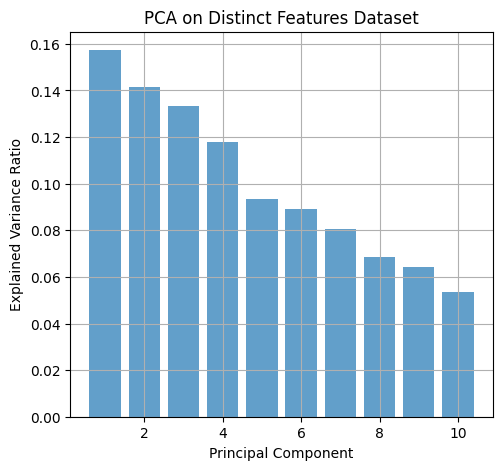

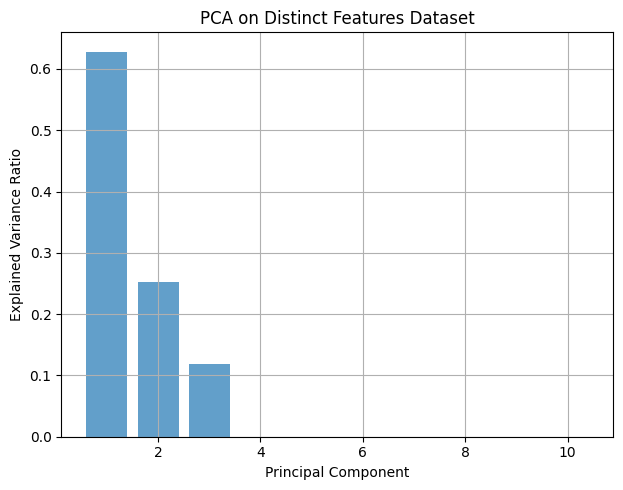

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 11), pca1.explained_variance_ratio_, alpha=0.7, label='Distinct Features')
plt.title('PCA on Distinct Features Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.bar(range(1, 11), pca2.explained_variance_ratio_, alpha=0.7, label='Distinct Features')
plt.title('PCA on Distinct Features Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
# TRANSFORM DATASET

data1_pca = pca1.transform(data1)
data2_pca = pca2.transform(data2)


In [36]:
data1_pca_df = pd.DataFrame(np.round(data1_pca, 4), columns=[f'PC_{i+1}' for i in range(data1_pca.shape[1])])
data1_pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.3567,-0.1412,0.0494,0.3260,0.4641,-0.1167,0.2447,0.5708,-0.0377,-0.1689
1,0.1709,0.1434,-0.1971,-0.0009,-0.2197,-0.1973,0.1083,-0.3723,-0.0827,-0.3175
2,-0.3769,-0.2211,0.1697,0.2045,0.1151,-0.2073,0.0885,-0.3607,0.1809,0.1831
3,-0.2009,-0.2650,0.0204,-0.2259,-0.1714,0.2739,-0.2066,-0.6705,-0.1892,0.1147
4,0.3750,0.2477,0.0565,0.1392,0.3050,0.2329,-0.0948,0.1848,-0.4578,0.1098


In [37]:
data2_pca_df = pd.DataFrame(np.round(data2_pca, 4), columns=[f'PC_{i+1}' for i in range(data2_pca.shape[1])])
data2_pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.0452,-1.0341,-0.6206,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
1,0.1981,1.0609,-0.0189,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
2,-0.8699,0.6993,-0.3689,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
3,-1.9152,0.4587,-0.0414,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
4,0.3832,0.8812,0.8053,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0


In [38]:
print("Projected Data for Dataset 1 (Distinct Features):")
display(data1_pca_df.head())

print("\nProjected Data for Dataset 2 (Derived Features):")
display(data2_pca_df.head())


Projected Data for Dataset 1 (Distinct Features):


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.3567,-0.1412,0.0494,0.3260,0.4641,-0.1167,0.2447,0.5708,-0.0377,-0.1689
1,0.1709,0.1434,-0.1971,-0.0009,-0.2197,-0.1973,0.1083,-0.3723,-0.0827,-0.3175
2,-0.3769,-0.2211,0.1697,0.2045,0.1151,-0.2073,0.0885,-0.3607,0.1809,0.1831
3,-0.2009,-0.2650,0.0204,-0.2259,-0.1714,0.2739,-0.2066,-0.6705,-0.1892,0.1147
4,0.3750,0.2477,0.0565,0.1392,0.3050,0.2329,-0.0948,0.1848,-0.4578,0.1098



Projected Data for Dataset 2 (Derived Features):


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.0452,-1.0341,-0.6206,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
1,0.1981,1.0609,-0.0189,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
2,-0.8699,0.6993,-0.3689,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
3,-1.9152,0.4587,-0.0414,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
4,0.3832,0.8812,0.8053,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0


a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\vicky kumar\AppData\Local\Temp\ipykernel_26648\2345425717.py:15: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


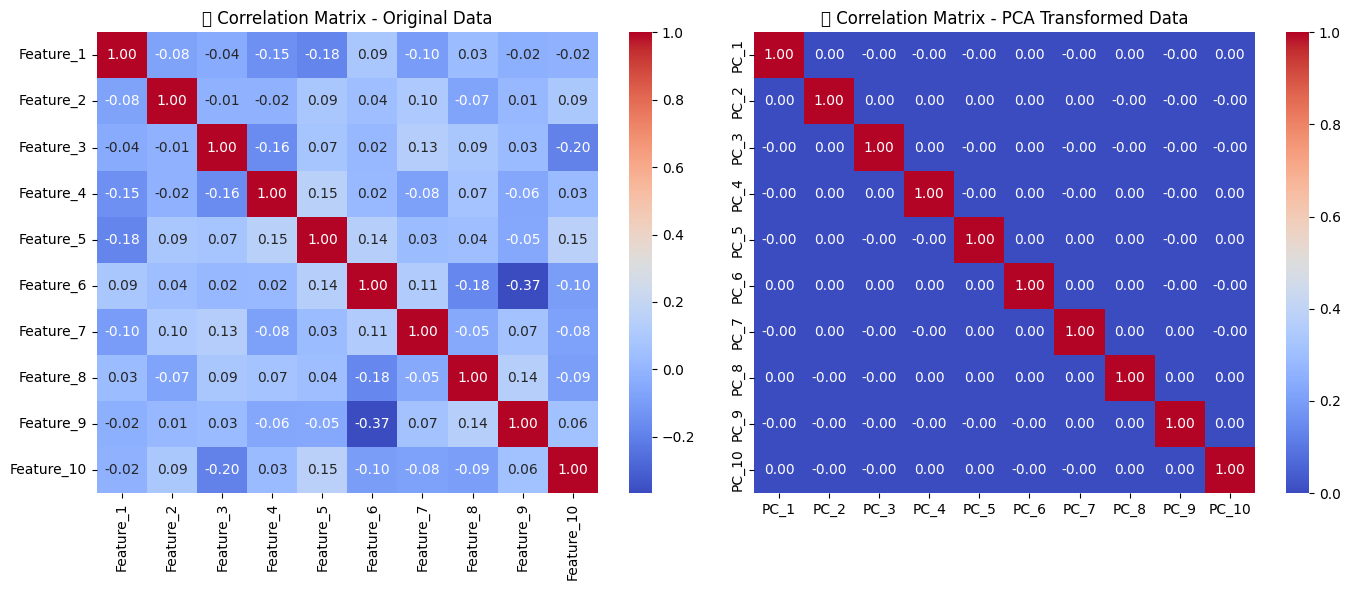

In [39]:
corr_original = data1.corr()      # Original data correlation
corr_pca = data1_pca_df.corr()    # PCA data correlation

# Visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_original, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - Original Data")

plt.subplot(1, 2, 2)
sns.heatmap(corr_pca, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - PCA Transformed Data")

plt.tight_layout()
plt.show()


a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\vicky kumar\AppData\Local\Temp\ipykernel_26648\2213049526.py:14: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


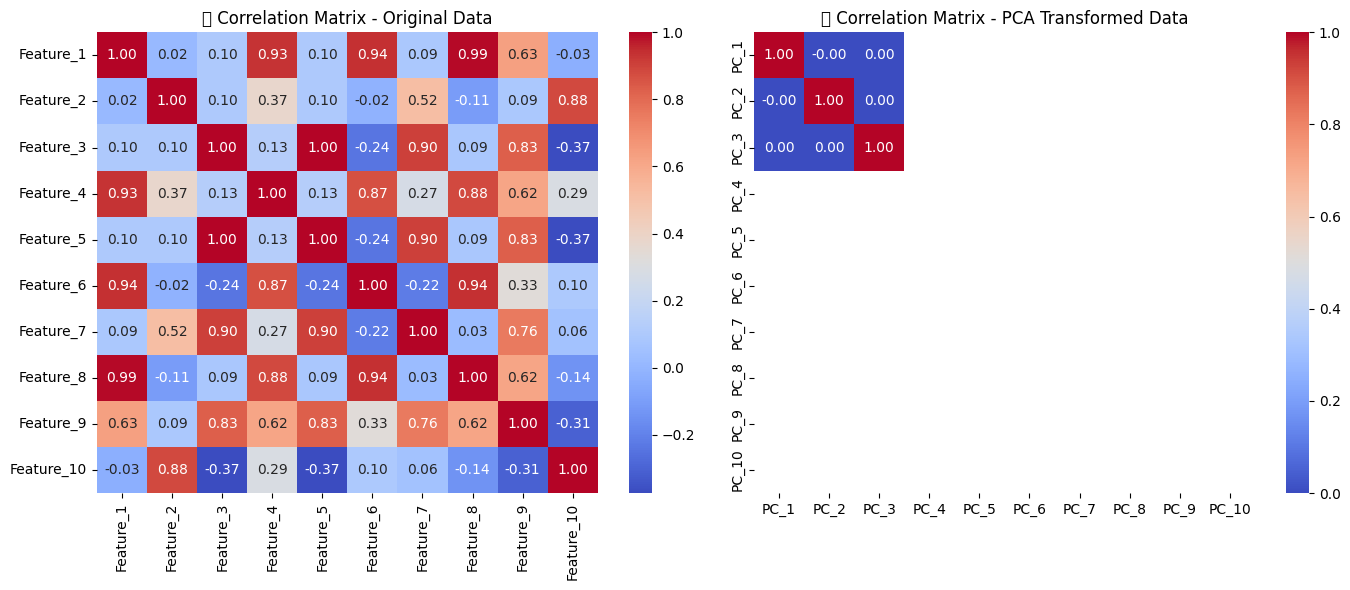

In [40]:
corr_original = data2.corr()      
corr_pca = data2_pca_df.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_original, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - Original Data")

plt.subplot(1, 2, 2)
sns.heatmap(corr_pca, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - PCA Transformed Data")

plt.tight_layout()
plt.show()


In [43]:
print(corr_pca)

           PC_1      PC_2      PC_3  PC_4  PC_5  PC_6  PC_7  PC_8  PC_9  PC_10
PC_1   1.000000 -0.000006  0.000001   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_2  -0.000006  1.000000  0.000002   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_3   0.000001  0.000002  1.000000   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_4        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_5        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_6        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_7        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_8        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_9        NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
PC_10       NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN


In [44]:
print(corr_original)

            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1    1.000000   0.016754   0.098666   0.933540   0.098666   0.940698   
Feature_2    0.016754   1.000000   0.101787   0.374064   0.101787  -0.018376   
Feature_3    0.098666   0.101787   1.000000   0.128009   1.000000  -0.244773   
Feature_4    0.933540   0.374064   0.128009   1.000000   0.128009   0.865941   
Feature_5    0.098666   0.101787   1.000000   0.128009   1.000000  -0.244773   
Feature_6    0.940698  -0.018376  -0.244773   0.865941  -0.244773   1.000000   
Feature_7    0.092143   0.515784   0.904769   0.270387   0.904769  -0.218664   
Feature_8    0.992408  -0.106345   0.085600   0.882364   0.085600   0.937756   
Feature_9    0.632768   0.088520   0.832996   0.618650   0.832996   0.332553   
Feature_10  -0.030638   0.884573  -0.373940   0.288722  -0.373940   0.097627   

            Feature_7  Feature_8  Feature_9  Feature_10  
Feature_1    0.092143   0.992408   0.632768   -0.030638  
Fea

a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\vicky kumar\AppData\Local\Temp\ipykernel_26648\3958039563.py:35: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
a:\ML_STAT\ML_-_Statstics_Hackerrank\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


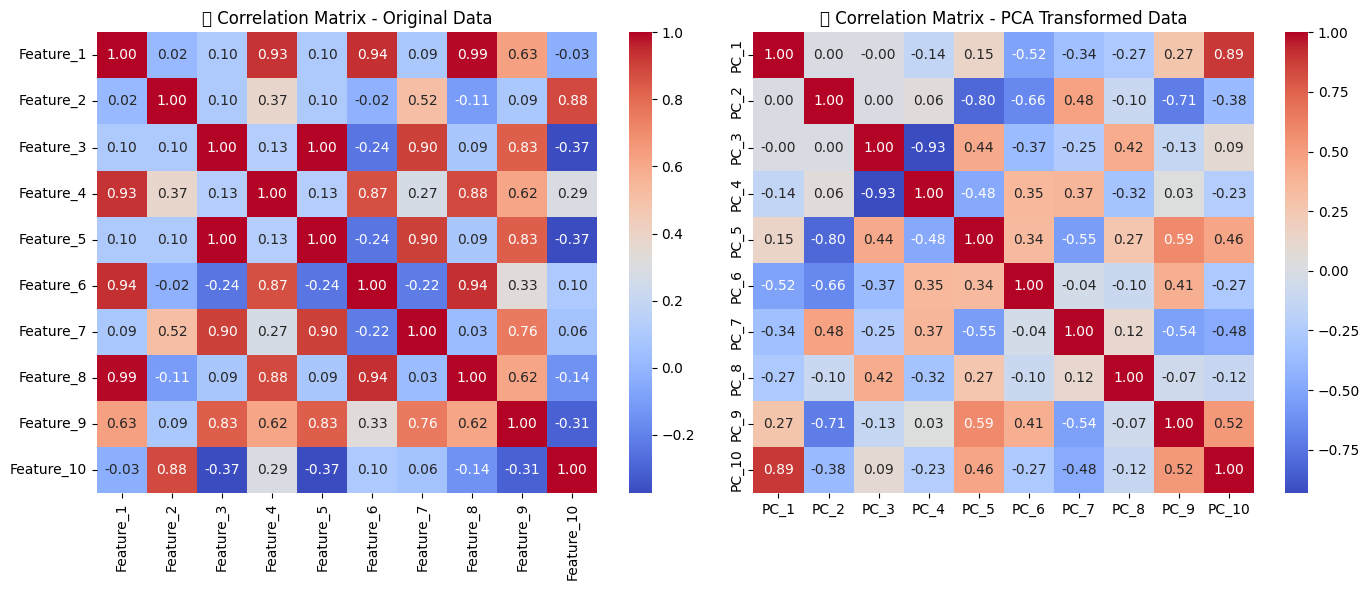

Explained Variance per component:
[4.54212268e+00 3.39856888e+00 2.16031855e+00 5.92091796e-16
 3.70309692e-16 2.11759483e-16 1.22244720e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Explained Variance Ratio per component:
[4.49670145e-01 3.36458319e-01 2.13871536e-01 5.86170878e-17
 3.66606595e-17 2.09641888e-17 1.21022273e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative Explained Variance:
[0.44967015 0.78612846 1.         1.         1.         1.
 1.         1.         1.         1.        ]


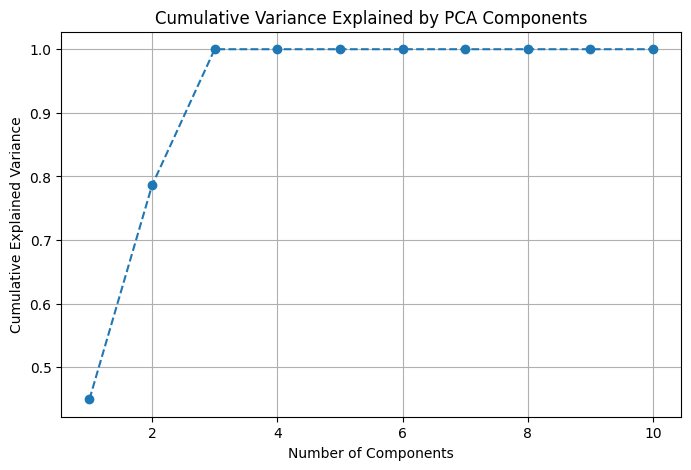

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suppose data2 is your original DataFrame
# Standardize data2
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Fit PCA and transform data
pca = PCA(n_components=10)
data2_pca = pca.fit_transform(data2_scaled)

# Create a DataFrame for the PCA transformed data for correlation plotting
data2_pca_df = pd.DataFrame(data2_pca, columns=[f'PC_{i+1}' for i in range(10)])

# Calculate correlation matrices
corr_original = data2.corr()      
corr_pca = data2_pca_df.corr()

# Plot correlation matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_original, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - Original Data")

plt.subplot(1, 2, 2)
sns.heatmap(corr_pca, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("🔎 Correlation Matrix - PCA Transformed Data")

plt.tight_layout()
plt.show()

# Calculate and print variance explained
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance per component:")
print(explained_variance)
print("\nExplained Variance Ratio per component:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Plot cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.show()
